# Summary and test of changes in the PR: `NCDM->DR Background`

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
font = {'size'   : 22}
matplotlib.rc("font", **font)
matplotlib.rc(["text.usetex", True])

## Implementation of ncdm_decay_dr species

In [2]:
cosmo = {}
Omega_dncdmdr = 0.001
basic_input = {
    'YHe'               : 0.24,
    'background_method' : 0,
    'N_ncdm_decay_dr'   : 1,
    'quadrature_strategy_ncdm_decay_dr': 3,
    'N_momentum_bins_ncdm_decay_dr'    : 20,
    'maximum_q_ncdm_decay_dr'          : 25
}

single_species_models = [{
        'm_ncdm_decay_dr':1.0,
        'Gamma_ncdm_decay_dr':0.0
    },
    {
        'm_ncdm_decay_dr':1.0,
        'Gamma_ncdm_decay_dr':1e+6
    },
    {
        'm_ncdm_decay_dr':1.0,
        'Gamma_ncdm_decay_dr':1e+12
    },
    {
        'm_ncdm_decay_dr':100.0,
        'log10lifetime_ncdm_decay_dr':6
    },
    {
        'm_ncdm_decay_dr':100.0,
        'log10lifetime_ncdm_decay_dr':4
    },
    {
        'm_ncdm_decay_dr':100.0,
        'log10lifetime_ncdm_decay_dr':2
    }
]

for idx, model in enumerate(single_species_models):
    t = basic_input | model | {'Omega_dncdmdr': Omega_dncdmdr}
#    print(model)
#    for key, val in t.items():
#        print(key, ' = ', val)
    cosmo[idx] = Class(basic_input | model | {'Neff_ini_dncdm': 1.0})
print("Class finished computations!")

Class finished computations!


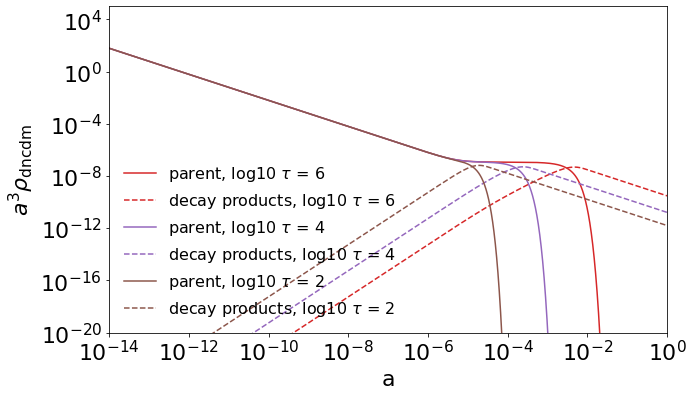

In [3]:
plt.figure(figsize=(10,6))
plt.xlabel('a'); plt.ylabel('$a^3 \\rho_{\\mathrm{dncdm}}$')
plt.xscale('log'); plt.yscale('log')
for idx in [3, 4, 5]:
    bg = cosmo[idx].get_background()
    alist = 1/(bg['z'] + 1)
    plt.plot(alist, alist**3*bg['(.)rho_ncdm[0]'], '-', color=f'C{idx}', label=f"parent, log10 $\\tau$ = {single_species_models[idx]['log10lifetime_ncdm_decay_dr']}")
    plt.plot(alist, alist**3*bg['(.)rho_dr[0]'], '--', color=f'C{idx}', label=f"decay products, log10 $\\tau$ = {single_species_models[idx]['log10lifetime_ncdm_decay_dr']}")
plt.xlim([min(alist), 1.0]); plt.ylim([1e-20, 1e+5])
plt.legend(frameon=False, loc='lower left', fontsize=16);

### Sanity check that Gamma=0.0 reduces to ncdm

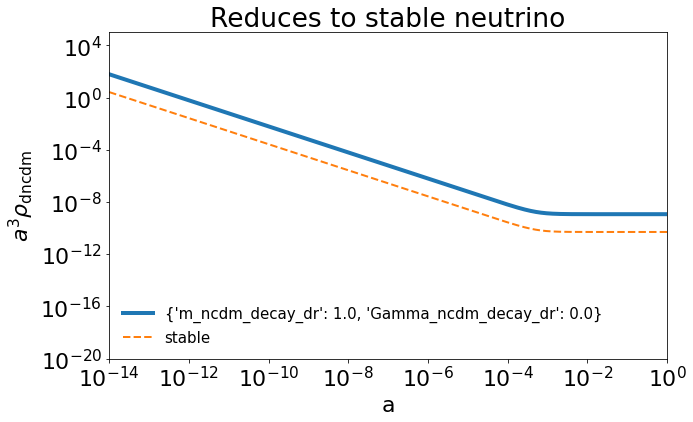

In [4]:
plt.figure(figsize=(10,6))
plt.title("Reduces to stable neutrino")
plt.xlabel('a'); plt.ylabel('$a^3 \\rho_{\\mathrm{dncdm}}$')
plt.xscale('log'); plt.yscale('log')
bg = cosmo[0].get_background()
alist = 1/(bg['z'] + 1)
plt.plot(alist, alist**3*bg['(.)rho_ncdm[0]'], '-', linewidth=4, label=single_species_models[0])
bg = Class({'N_ncdm_standard':1, 'm_ncdm_standard': single_species_models[0]['m_ncdm_decay_dr'], 'Omega_ncdm': Omega_dncdmdr}).get_background()
alist = 1/(bg['z'] + 1)
plt.plot(alist, alist**3*bg['(.)rho_ncdm[0]'], '--', linewidth=2, label="stable")
plt.xlim([min(alist), 1.0]); plt.ylim([1e-20, 1e+5])
plt.legend(frameon=False, loc='lower left', fontsize=15);

### Different input settings, will shoot between (deg_ncdm_decay_dr, Omega_dncdmdr, Omega_ini_dncdm)

In [5]:
shooting_models = [{
        'Omega_dncdmdr': 0.01,
    },
    {
        'omega_dncdmdr': 0.005,
    },
    {
        'Omega_ini_dncdm': 0.01,
    },
    {
        'omega_ini_dncdm': 0.005,
    },
    {
        'deg_ncdm_decay_dr': 1.0,
    }
]

for model in shooting_models:
    print(model)
    Class(basic_input | model | {'m_ncdm_decay_dr': 10.0, 'Gamma_ncdm_decay_dr': 1e+8})
print("Class finished computations!")

{'Omega_dncdmdr': 0.01}
{'omega_dncdmdr': 0.005}
{'Omega_ini_dncdm': 0.01}
{'omega_ini_dncdm': 0.005}
{'deg_ncdm_decay_dr': 1.0}
Class finished computations!


## Multiple decaying species

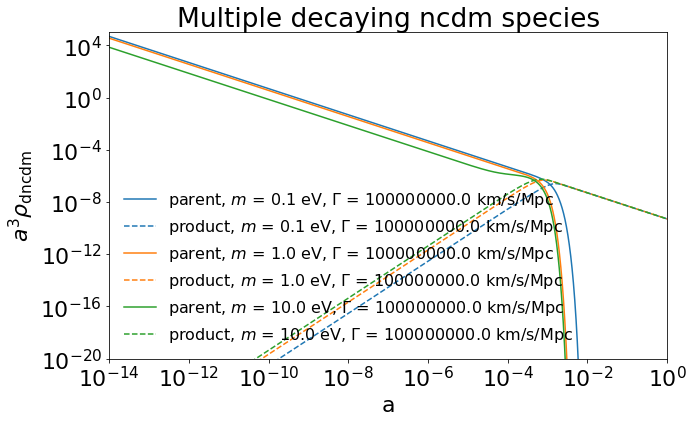

In [6]:
masses = [0.1, 1.0, 10.0]
Gammas = [1e+8, 1e+8, 1e+8]
multiple_decaying_ncdm = {
    'N_ncdm_decay_dr'    : 3,
    'm_ncdm_decay_dr'    : ', '.join([str(mass) for mass in masses]),
    'Gamma_ncdm_decay_dr': ', '.join([str(Gamma) for Gamma in Gammas]),
    'Omega_dncdmdr'      : '0.01, 0.01, 0.01',
    'background_method': 0,
    'quadrature_strategy_ncdm_decay_dr': '3, 3, 3'
}
bg = Class(multiple_decaying_ncdm).get_background()
alist = 1/(bg['z'] + 1)
plt.figure(figsize=(10,6))
plt.title('Multiple decaying ncdm species')
plt.xlabel('a'); plt.ylabel('$a^3 \\rho_{\\mathrm{dncdm}}$')
plt.xscale('log'); plt.yscale('log')
for idx in range(3):
    plt.plot(alist, alist**3*bg[f'(.)rho_ncdm[{idx}]'], '-', color=f'C{idx}', label=f"parent, $m$ = {masses[idx]} eV, $\\Gamma$ = {Gammas[idx]} km/s/Mpc")
    plt.plot(alist, alist**3*bg[f'(.)rho_dr[{idx}]'], '--', color=f'C{idx}', label=f"product, $m$ = {masses[idx]} eV, $\\Gamma$ = {Gammas[idx]} km/s/Mpc")
plt.xlim([min(alist), 1.0]); plt.ylim([1e-20, 1e+5])
plt.legend(frameon=False, loc='lower left', fontsize=16);

## Both decaying and stable species simultaneously

In [7]:
with_stable = {
    'N_ncdm_standard'        : 2,
    'm_ncdm_standard'        : '10.0, 10.0',
    'Omega_ncdm_standard'    : '0.05, 0.005',
    
    'N_ncdm_decay_dr'        : 2,
    'm_ncdm_decay_dr'        : '10.0, 10.0',
    'Gamma_ncdm_decay_dr'    : '1e+8, 1e+8',
    'Omega_dncdmdr'          : '0.005, 0.005',
    'quadrature_strategy_ncdm_decay_dr': '3, 3',
    'N_momentum_bins_ncdm_decay_dr'    : '20, 20',
    
    'background_method': 1
}
bg = Class(with_stable).get_background()

## Both decaying ncdm and dcdm simultaneously

In [8]:
with_dcdm = {
    'Omega_dcdmdr'           : 0.01,
    'Gamma_dcdm'             : 1e+8,
    
    'N_ncdm_decay_dr'        : 2,
    'm_ncdm_decay_dr'        : '10.0, 10.0',
    'Gamma_ncdm_decay_dr'    : '1e+8, 1e+8',
    'Omega_dncdmdr'          : '0.005, 0.005',
    'quadrature_strategy_ncdm_decay_dr': '3, 3',
    'N_momentum_bins_ncdm_decay_dr'    : '20, 20',
    
    'background_method': 1
}

bg = Class(with_dcdm).get_background()

## A model with ncdm, dcdm and multiple dncdm species!

In [9]:
big_model = {
    'N_ncdm_standard'        : 1,
    'm_ncdm_standard'        : 10.0,
    'Omega_ncdm_standard'    : 0.01,
    
    'Omega_dcdmdr'           : 0.01,
    'Gamma_dcdm'             : 1e+8,
    
    'N_ncdm_decay_dr'        : 2,
    'm_ncdm_decay_dr'        : '10.0, 10.0',
    'Gamma_ncdm_decay_dr'    : '1e+8, 1e+8',
    'Omega_dncdmdr'          : '0.001, 0.01',
    'quadrature_strategy_ncdm_decay_dr': '3, 3',
    'N_momentum_bins_ncdm_decay_dr'    : '20, 20',
    
    'background_method': 1
}
bg = Class(big_model).get_background()

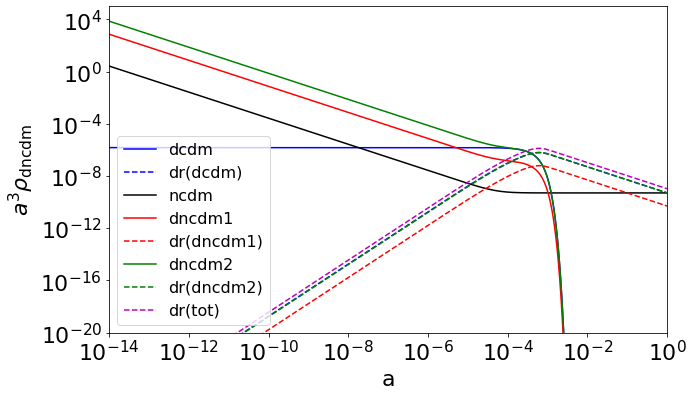

In [10]:
alist = 1/(bg['z'] + 1)

plt.figure(figsize=(10,6))
plt.xlabel('a'); plt.ylabel('$a^3 \\rho_{\\mathrm{dncdm}}$')
plt.xscale('log'); plt.yscale('log')

plt.plot(alist, alist**3*bg['(.)rho_dcdm'], 'b-', label=f"dcdm")
plt.plot(alist, alist**3*bg['(.)rho_dr[0]'], 'b--', label=f"dr(dcdm)")

plt.plot(alist, alist**3*bg['(.)rho_ncdm[0]'], 'k-', label=f"ncdm")

plt.plot(alist, alist**3*bg['(.)rho_ncdm[1]'], 'r-', label=f"dncdm1")
plt.plot(alist, alist**3*bg['(.)rho_dr[1]'], 'r--', label=f"dr(dncdm1)")

plt.plot(alist, alist**3*bg['(.)rho_ncdm[2]'], 'g-', label=f"dncdm2")
plt.plot(alist, alist**3*bg['(.)rho_dr[2]'], 'g--', label=f"dr(dncdm2)")

plt.plot(alist, alist**3*bg['(.)rho_dr'], 'm--', label=f"dr(tot)")

plt.xlim([min(alist), 1.0]); plt.ylim([1e-20, 1e+5])
plt.legend(frameon=True, loc='lower left', fontsize=16);

# Shooting guesses from analytical solutions

The shooting algorithm requires an approximate relation between the total final energy density parameter and the initial densities. The implemented relation are based on the analytical solutions from XXXX.XXXX, and are tested below.

In [11]:
Omega_ini = 0.00000001
mass = 10

k_B = 1.3806504e-23  # Boltzmann constant J/K
eV = 1.602176487e-19 # 1 eV in Joule
c = 2.99792458e+8    # light speed in m/s
T_cmb = 2.7254       # CMB temperature in K
T0 = 0.71611

import scipy.special as sc
def expn(p, x): # Workaround through relation with incomplete Gamma; here upper incomplete 
    return x**(p - 1)*sc.gammaincc(1 - p, x)*sc.gamma(1 - p)

def expn_m_one_half(x):
    return np.exp(-x)/x + 0.5/x*np.sqrt(np.pi/x)*sc.erfc(np.sqrt(x))

def Omega_final_guess(class_instance, Gamma, Omega_ini_dncdm, mass):
    # The Omega_dncdmdr guess implemented in input_get_guess, assuming Omega_ini_dncdm is given
    params = class_instance.get_current_derived_parameters(['Omega_g', 'H0'])
    Omega_r0, H0 = params['Omega_g'], params['H0']*1000/c
    G = Gamma*1000/c
    a_nr  = 3.15/(mass*eV/k_B/(T0*T_cmb))
    k_rad = np.sqrt(2*H0*np.sqrt(Omega_r0))
    t_nr  = (a_nr/k_rad)**2
    Omega_f = 0.8826*k_rad*Omega_ini/a_nr*G**(-0.5)*np.exp(G*t_nr)
    
    # This function contains the generalized exponential integral solution and is more exact than above for G*t_nr !<< 1
    Omega_f_no_exp = np.sqrt(2)*k_rad*Omega_ini/a_nr*G*np.exp(G*t_nr)*t_nr**(3/2)*expn(-1/2, G*t_nr)
    return Omega_f, Omega_f_no_exp

def Omega_final_guess_matter(class_instance, Gamma, Omega_ini_dncdm, mass):
    # Solution assuming matter domination
    params = class_instance.get_current_derived_parameters(['Omega_m', 'H0'])
    Omega_m, H0 = params['Omega_m'], params['H0']*1000/c
    G = Gamma*1000/c
    a_nr  = 3.15/(mass*eV/k_B/(T0*T_cmb))
    k_mat = (3*H0*np.sqrt(Omega_m)/2)**(2/3)
    t_nr  = (a_nr/k_mat)**(3/2)
    Omega_f_no_exp = np.sqrt(2)*k_mat*Omega_ini/a_nr*G*np.exp(G*t_nr)*t_nr**(5/3)*expn(-2/3, G*t_nr)
    return 0, Omega_f_no_exp
    
Gamma_list = np.logspace(5, 9, 10)
Omega_class, Omega_guess, Omega_guess_no_exp, Omega_guess_no_exp_matter = [], [], [], []

for Gamma in Gamma_list:
    dwdm = Class(basic_input | {'Omega_ini_dncdm': Omega_ini, 'm_ncdm_decay_dr': mass, 'Gamma_ncdm_decay_dr': Gamma})
    bg = dwdm.get_background()
    Omega_class.append(bg['(.)rho_dr'][-1]/bg['(.)rho_crit'][-1])
    Omega_f, Omega_f_no_exp = Omega_final_guess(dwdm, Gamma, Omega_ini, mass)
    Omega_guess.append(Omega_f)
    Omega_guess_no_exp.append(Omega_f_no_exp)
    ___, Omega_f_no_exp_matter = Omega_final_guess_matter(dwdm, Gamma, Omega_ini, mass)
    Omega_guess_no_exp_matter.append(Omega_f_no_exp_matter)

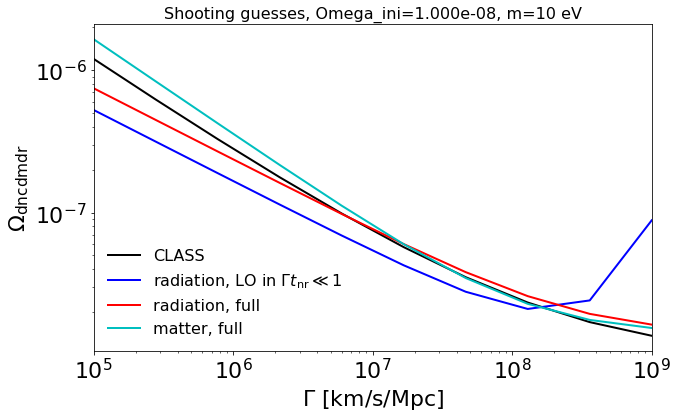

In [12]:
plt.figure(figsize=(10,6))
plt.title(f'Shooting guesses, Omega_ini={Omega_ini:.3e}, m={mass} eV', fontsize=16)
plt.xlabel(r'$\Gamma$ [km/s/Mpc]'); plt.ylabel('$\Omega_{\mathrm{dncdmdr}}$')
plt.xscale('log')
plt.yscale('log')
plt.plot(Gamma_list, Omega_class, 'k-', lw=2, label='CLASS')
plt.plot(Gamma_list, Omega_guess, 'b-', lw=2, label=r'radiation, LO in $\Gamma t_{\mathrm{nr}} \ll 1$')
plt.plot(Gamma_list, Omega_guess_no_exp, 'r-', lw=2, label='radiation, full')
plt.plot(Gamma_list, Omega_guess_no_exp_matter, 'c-', lw=2, label='matter, full')
plt.xlim([min(Gamma_list), max(Gamma_list)])
plt.legend(frameon=False, loc='lower left', fontsize=16);

* As $\Gamma$ becomes too large, the approximation $\Gamma t_{\mathrm{nr}} \ll 1$ fails!

* Furthermore, the radiation and matter solutions are similar.

We therefore have implemented the full radiation domination solution. The order of the exponential integral is $-1/2$, and can be written in terms of the complementary error function, as detailed in XXXX.XXXX.

# Neff_ini_dncdm as input
... as implemented in pull request #138, responding to issue #93.

In [13]:
Neff_list = [0.01, 0.1, 0.5]
Omega_g = 2.47298e-5/0.67/0.67

def Neff_to_Omega_ini(Neff):
    return Neff*7/8*(4/11)**(4/3)*Omega_g

cosmology = {
    'YHe'               : 0.24,
    'Omega_g'           : Omega_g,
    'N_ncdm_decay_dr'   : 1,
    'background_method' : 0,
    'quadrature_strategy_ncdm_decay_dr': 3,
    'N_momentum_bins_ncdm_decay_dr'    : 20,
    'Gamma_ncdm_decay_dr'              : 1e+8,
    'm_ncdm_decay_dr'                  : 10
}

class_neff = []
for Neff in Neff_list:
    print(f"Running with Neff_ini_dncdm={Neff:.3}, corresponding to Omega_ini_dncdm={Neff_to_Omega_ini(Neff):.3}")
    class_neff.append(Class(cosmology | {'Neff_ini_dncdm': Neff}).compute())
    


Running with Neff_ini_dncdm=0.01, corresponding to Omega_ini_dncdm=1.25e-07
Running with Neff_ini_dncdm=0.1, corresponding to Omega_ini_dncdm=1.25e-06
Running with Neff_ini_dncdm=0.5, corresponding to Omega_ini_dncdm=6.26e-06


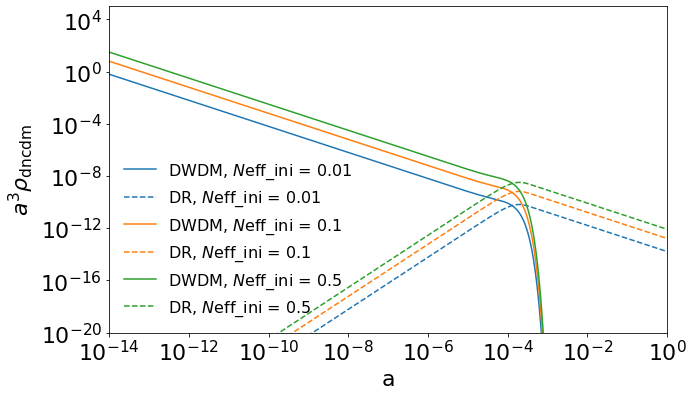

In [14]:
plt.figure(figsize=(10,6))
plt.xlabel('a'); plt.ylabel('$a^3 \\rho_{\\mathrm{dncdm}}$')
plt.xscale('log'); plt.yscale('log')
for idx, cl in enumerate(class_neff):
    bg = cl.get_background()
    alist = 1/(bg['z'] + 1)
    plt.plot(alist, alist**3*bg['(.)rho_ncdm[0]'], '-', color=f'C{idx}', label=f"DWDM, $N$eff_ini = {Neff_list[idx]}")
    plt.plot(alist, alist**3*bg['(.)rho_dr[0]'], '--', color=f'C{idx}', label=f"DR, $N$eff_ini = {Neff_list[idx]}")
plt.xlim([min(alist), 1.0]); plt.ylim([1e-20, 1e+5])
plt.legend(frameon=False, loc='lower left', fontsize=16);

### Reduction to pure $N_{\mathrm{eff}}$ when $m=0$

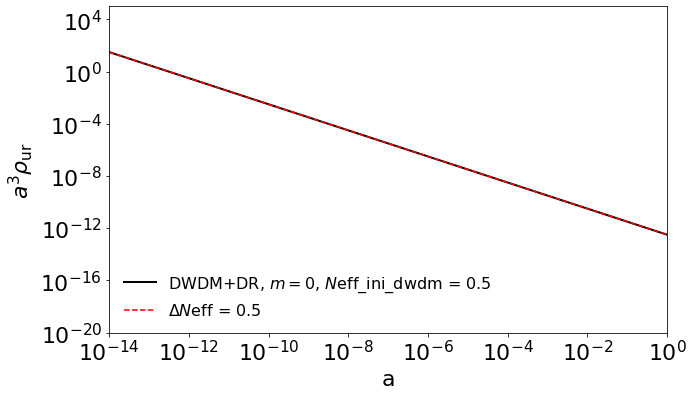

In [16]:
Neff = 0.5

cosmology = {
    'YHe'               : 0.24,
    'Omega_g'           : Omega_g,
    'N_ncdm_decay_dr'   : 1,
    'background_method' : 0,
    'quadrature_strategy_ncdm_decay_dr': 3,
    'N_momentum_bins_ncdm_decay_dr'    : 20,
    'Gamma_ncdm_decay_dr'              : 1e+8,
    'm_ncdm_decay_dr'                  : 0.0
}

neff_dwdm = Class(cosmology | {'m_ncdm_decay_dr' : 0.0, 'Neff_ini_dncdm' : Neff}).compute()
neff_pure = Class(cosmology | {'N_eff' : Neff}).compute()

plt.figure(figsize=(10,6))
plt.xlabel('a'); plt.ylabel('$a^3 \\rho_{\\mathrm{ur}}$')
plt.xscale('log'); plt.yscale('log')

bg = neff_dwdm.get_background()
alist = 1/(bg['z'] + 1)
plt.plot(alist, alist**3*(bg['(.)rho_ncdm[0]'] + bg['(.)rho_dr[0]']), 'k-', lw=2, label=f"DWDM+DR, $m=0$, $N$eff_ini_dwdm = {Neff}")

bg = neff_pure.get_background()
alist = 1/(bg['z'] + 1)
plt.plot(alist, alist**3*bg['(.)rho_ur'], 'r--', label=f"$\Delta N$eff = {Neff}")


plt.xlim([min(alist), 1.0]); plt.ylim([1e-20, 1e+5])
plt.legend(frameon=False, loc='lower left', fontsize=16);